In [540]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft

[0.      0.15625 0.3125  0.46875 0.625   0.78125 0.9375  1.09375 1.25
 1.40625 1.5625  1.71875 1.875   2.03125 2.1875  2.34375 2.5     2.65625
 2.8125  2.96875 3.125   3.28125 3.4375  3.59375 3.75    3.90625 4.0625
 4.21875 4.375   4.53125 4.6875  4.84375 5.      5.15625 5.3125  5.46875
 5.625   5.78125 5.9375  6.09375 6.25    6.40625 6.5625  6.71875 6.875
 7.03125 7.1875  7.34375 7.5     7.65625 7.8125  7.96875 8.125   8.28125
 8.4375  8.59375 8.75    8.90625 9.0625  9.21875 9.375   9.53125 9.6875
 9.84375]


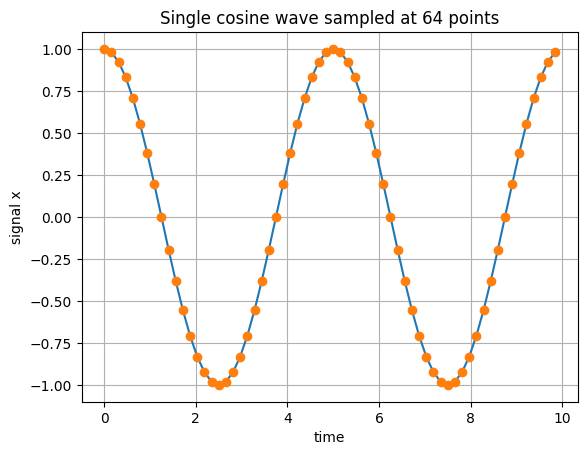

In [541]:
N=64 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.2 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

In [542]:
def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values
    # (in python3, // ensures integer division)

    # frq is array of actual frequencies
    # X is complex array of amplitudes
    return frq , X

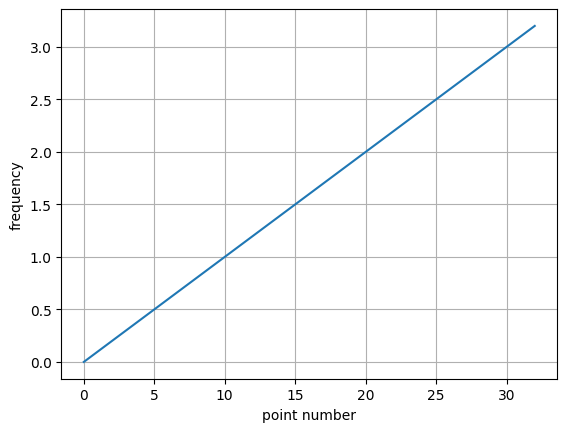

In [543]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq,)
plt.xlabel('point number')
plt.ylabel('frequency')
plt.grid()

[-1.51027238e-17+0.00000000e+00j -6.57539646e-17+2.73952480e-17j
  5.00000000e-01-1.71433198e-16j  3.15218794e-17-1.52091252e-17j
 -2.73655488e-18-5.74860405e-19j  3.39366570e-17-3.19107167e-17j
 -3.46944695e-18-5.50859672e-18j  2.28336168e-17+2.02708552e-17j
  8.87114816e-19+1.24468911e-18j -1.50778956e-17-1.32040255e-18j
  4.38400669e-17+2.12443910e-17j -5.08806268e-18+1.84715055e-17j
  1.68000973e-18+1.18946890e-17j  2.10462876e-17-1.29552401e-17j
 -1.38777878e-17+4.89974413e-18j  9.41745543e-18+1.07408136e-17j
  1.00507666e-17+2.60208521e-18j -2.11843120e-17+3.16548162e-17j
 -2.42861287e-17-2.22469789e-17j -2.21808446e-17-4.41940088e-17j
 -3.83904511e-18-1.67027156e-17j  2.63797015e-18-3.57970783e-17j
  1.00613962e-16-5.50859672e-18j  1.34089024e-17+5.21307292e-17j
 -2.24189451e-17+2.20613708e-17j  1.37828910e-17+1.27259608e-17j
 -5.61786317e-17+4.00287177e-17j -1.41586924e-18-1.58502913e-17j
  2.02036752e-17-1.41668940e-18j -1.71602147e-17+2.38811152e-17j
  0.00000000e+00-1.115483

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


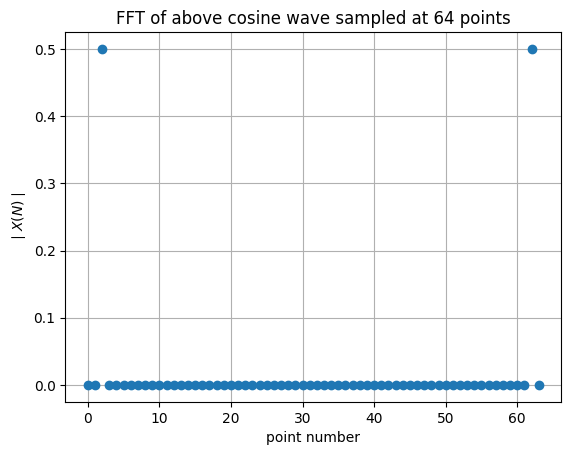

In [544]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


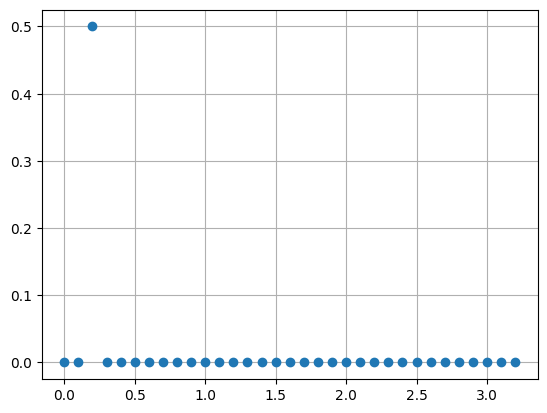

In [545]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq,X, 'o')
plt.grid()

[0.      0.15625 0.3125  0.46875 0.625   0.78125 0.9375  1.09375 1.25
 1.40625 1.5625  1.71875 1.875   2.03125 2.1875  2.34375 2.5     2.65625
 2.8125  2.96875 3.125   3.28125 3.4375  3.59375 3.75    3.90625 4.0625
 4.21875 4.375   4.53125 4.6875  4.84375 5.      5.15625 5.3125  5.46875
 5.625   5.78125 5.9375  6.09375 6.25    6.40625 6.5625  6.71875 6.875
 7.03125 7.1875  7.34375 7.5     7.65625 7.8125  7.96875 8.125   8.28125
 8.4375  8.59375 8.75    8.90625 9.0625  9.21875 9.375   9.53125 9.6875
 9.84375]


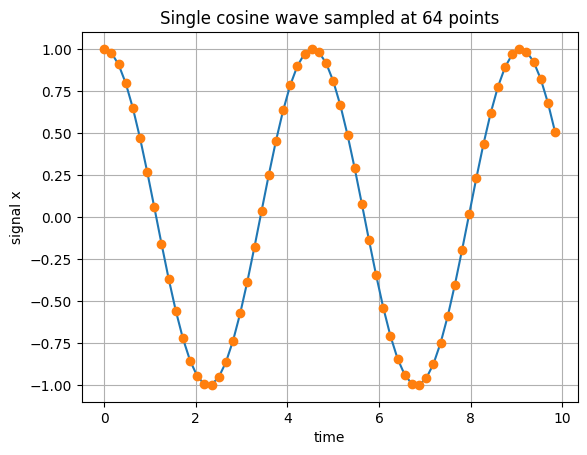

In [546]:
# Examine a small number of points to see what happens more easily
N=64 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.22 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

[ 0.07393306+0.j          0.09185023+0.02872745j  0.40156316+0.26201852j
 -0.07491952-0.07904172j -0.0247105 -0.03906191j -0.01139068-0.02683066j
 -0.00556099-0.02064153j -0.00241668-0.01680764j -0.00050672-0.01415557j
  0.00074739-0.01218832j  0.00161777-0.01065663j  0.00224745-0.0094206j
  0.00271796-0.0083951j   0.00307873-0.00752512j  0.00336121-0.00677337j
  0.00358625-0.00611359j  0.00376808-0.00552671j  0.00391675-0.00499851j
  0.00403948-0.00451811j  0.00414157-0.00407707j  0.00422699-0.00366868j
  0.00429874-0.00328753j  0.00435914-0.0029292j   0.00440998-0.00259003j
  0.00445266-0.0022669j   0.00448828-0.00195719j  0.0045177 -0.0016586j
  0.0045416 -0.00136911j  0.00456051-0.00108692j  0.00457484-0.00081038j
  0.00458487-0.000538j    0.00459081-0.00026833j  0.00459277+0.j
  0.00459081+0.00026833j  0.00458487+0.000538j    0.00457484+0.00081038j
  0.00456051+0.00108692j  0.0045416 +0.00136911j  0.0045177 +0.0016586j
  0.00448828+0.00195719j  0.00445266+0.0022669j   0.00440998+0

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


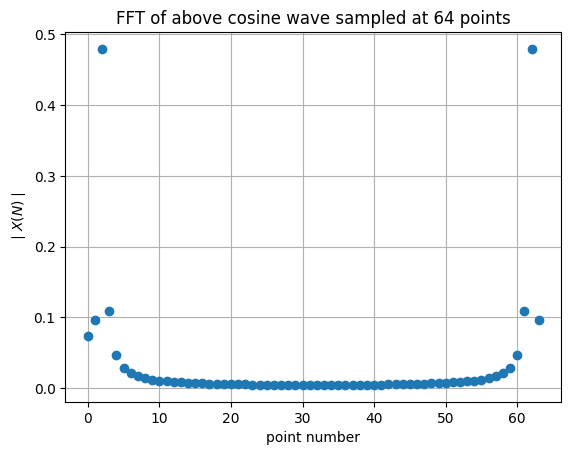

In [547]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

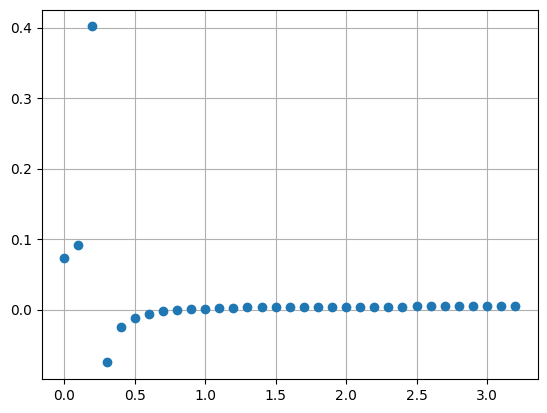

In [548]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq, X, 'o')
plt.grid()

[0.        0.0390625 0.078125  0.1171875 0.15625   0.1953125 0.234375
 0.2734375 0.3125    0.3515625 0.390625  0.4296875 0.46875   0.5078125
 0.546875  0.5859375 0.625     0.6640625 0.703125  0.7421875 0.78125
 0.8203125 0.859375  0.8984375 0.9375    0.9765625 1.015625  1.0546875
 1.09375   1.1328125 1.171875  1.2109375 1.25      1.2890625 1.328125
 1.3671875 1.40625   1.4453125 1.484375  1.5234375 1.5625    1.6015625
 1.640625  1.6796875 1.71875   1.7578125 1.796875  1.8359375 1.875
 1.9140625 1.953125  1.9921875 2.03125   2.0703125 2.109375  2.1484375
 2.1875    2.2265625 2.265625  2.3046875 2.34375   2.3828125 2.421875
 2.4609375 2.5       2.5390625 2.578125  2.6171875 2.65625   2.6953125
 2.734375  2.7734375 2.8125    2.8515625 2.890625  2.9296875 2.96875
 3.0078125 3.046875  3.0859375 3.125     3.1640625 3.203125  3.2421875
 3.28125   3.3203125 3.359375  3.3984375 3.4375    3.4765625 3.515625
 3.5546875 3.59375   3.6328125 3.671875  3.7109375 3.75      3.7890625
 3.828125  3.86718

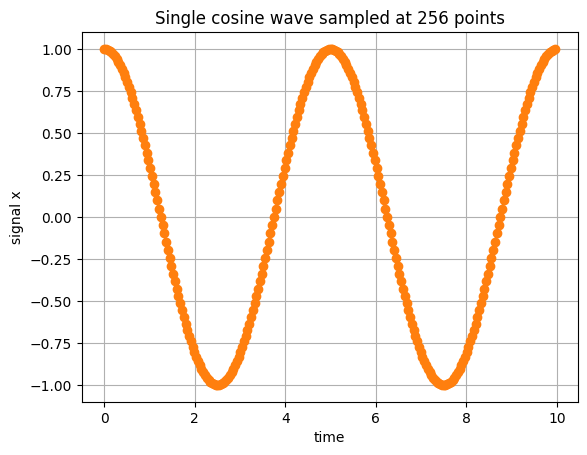

In [549]:
# Examine a small number of points to see what happens more easily
N=256 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.2 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

[-3.20733577e-17+0.00000000e+00j -5.60506780e-17+6.90265747e-18j
  5.00000000e-01-1.43472261e-16j  3.08191477e-17-4.38366587e-18j
  4.28366333e-18+1.27551216e-18j  1.61949105e-17-1.14694389e-17j
  6.50521303e-18+5.99542559e-18j  7.95025061e-18+2.74730137e-18j
  4.05379822e-18+1.28373866e-19j -3.66881649e-18+4.02018231e-19j
  1.76912319e-17+1.19646559e-17j  1.70087109e-18+5.17890408e-18j
  2.73419136e-18-8.63775723e-19j  7.27806341e-18-4.24799849e-18j
 -1.86160973e-17+2.32691426e-18j -2.41760797e-18-4.14483524e-18j
  6.63138305e-18-5.93778047e-19j -8.16743294e-18+9.17183465e-18j
 -1.16065218e-17-9.20675968e-18j  1.61071776e-18-5.94851637e-18j
 -1.35372785e-17-7.21217965e-18j  1.66413625e-17-3.88300594e-17j
  6.20772584e-17+1.89830160e-18j  1.26760207e-17+4.47872738e-17j
 -8.05617750e-18+2.34430977e-17j -2.27032120e-18+3.24031295e-17j
 -5.47284865e-17+1.64066998e-17j -1.16436550e-17-3.59617253e-17j
  1.29280703e-17-6.28306111e-18j -1.15754702e-17+8.74337545e-18j
 -5.23261306e-18-3.704525

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


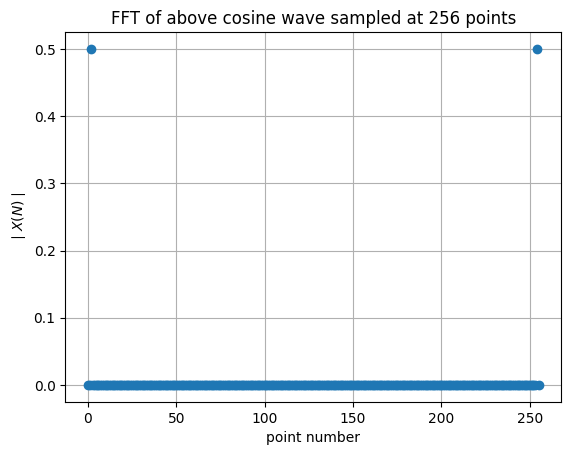

In [550]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

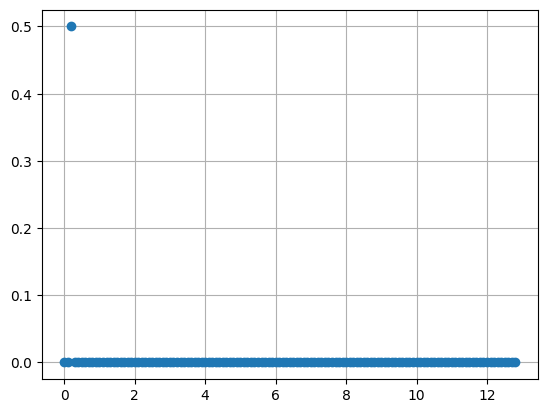

In [551]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq,X, 'o')
plt.grid()

[0.        0.0390625 0.078125  0.1171875 0.15625   0.1953125 0.234375
 0.2734375 0.3125    0.3515625 0.390625  0.4296875 0.46875   0.5078125
 0.546875  0.5859375 0.625     0.6640625 0.703125  0.7421875 0.78125
 0.8203125 0.859375  0.8984375 0.9375    0.9765625 1.015625  1.0546875
 1.09375   1.1328125 1.171875  1.2109375 1.25      1.2890625 1.328125
 1.3671875 1.40625   1.4453125 1.484375  1.5234375 1.5625    1.6015625
 1.640625  1.6796875 1.71875   1.7578125 1.796875  1.8359375 1.875
 1.9140625 1.953125  1.9921875 2.03125   2.0703125 2.109375  2.1484375
 2.1875    2.2265625 2.265625  2.3046875 2.34375   2.3828125 2.421875
 2.4609375 2.5       2.5390625 2.578125  2.6171875 2.65625   2.6953125
 2.734375  2.7734375 2.8125    2.8515625 2.890625  2.9296875 2.96875
 3.0078125 3.046875  3.0859375 3.125     3.1640625 3.203125  3.2421875
 3.28125   3.3203125 3.359375  3.3984375 3.4375    3.4765625 3.515625
 3.5546875 3.59375   3.6328125 3.671875  3.7109375 3.75      3.7890625
 3.828125  3.86718

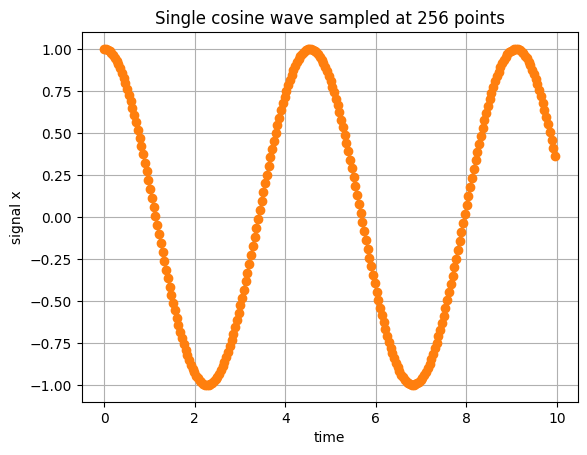

In [552]:
# Examine a small number of points to see what happens more easily
N=256 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.22 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

[ 7.01352887e-02+0.00000000e+00j  8.80525876e-02+2.86444175e-02j
  3.97765905e-01+2.61852379e-01j -7.87161267e-02-7.92911465e-02j
 -2.85061959e-02-3.93948861e-02j -1.51851975e-02-2.72475252e-02j
 -9.35405797e-03-2.11427314e-02j -6.20801195e-03-1.73937027e-02j
 -4.29604031e-03-1.48271135e-02j -3.03960542e-03-1.29460685e-02j
 -2.16660070e-03-1.15014098e-02j -1.53397025e-03-1.03533347e-02j
 -1.06017002e-03-9.41683434e-03j -6.95758356e-04-8.63700369e-03j
 -4.09256299e-04-7.97667546e-03j -1.79808564e-04-7.40972561e-03j
  6.86602359e-06-6.91721779e-03j  1.60823990e-04-6.48506839e-03j
  2.89318724e-04-6.10257233e-03j  3.97691790e-04-5.76143898e-03j
  4.89949246e-04-5.45514253e-03j  5.69144409e-04-5.17847259e-03j
  6.37638142e-04-4.92721639e-03j  6.97279588e-04-4.69792929e-03j
  7.49534049e-04-4.48776627e-03j  7.95574986e-04-4.29435611e-03j
  8.36351242e-04-4.11570616e-03j  8.72636824e-04-3.95012924e-03j
  9.05068258e-04-3.79618701e-03j  9.34172934e-04-3.65264549e-03j
  9.60390848e-04-3.518439

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


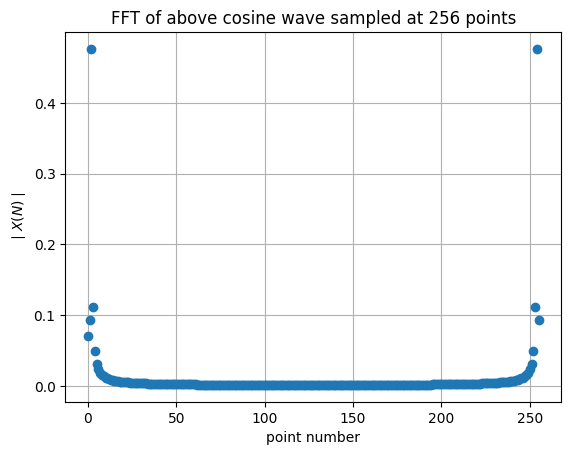

In [553]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

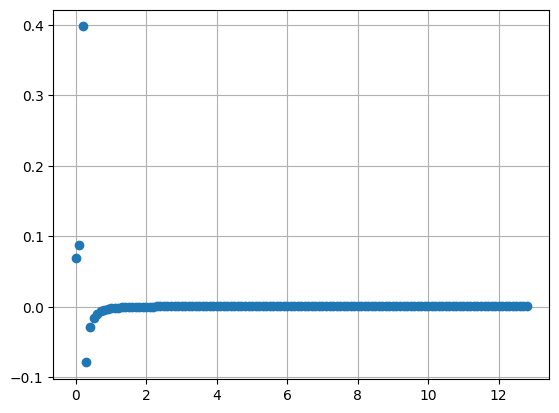

In [554]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq,X, 'o')
plt.grid()
# more points graph becomes more elongatred

[ 0.       0.78125  1.5625   2.34375  3.125    3.90625  4.6875   5.46875
  6.25     7.03125  7.8125   8.59375  9.375   10.15625 10.9375  11.71875
 12.5     13.28125 14.0625  14.84375 15.625   16.40625 17.1875  17.96875
 18.75    19.53125 20.3125  21.09375 21.875   22.65625 23.4375  24.21875
 25.      25.78125 26.5625  27.34375 28.125   28.90625 29.6875  30.46875
 31.25    32.03125 32.8125  33.59375 34.375   35.15625 35.9375  36.71875
 37.5     38.28125 39.0625  39.84375 40.625   41.40625 42.1875  42.96875
 43.75    44.53125 45.3125  46.09375 46.875   47.65625 48.4375  49.21875]


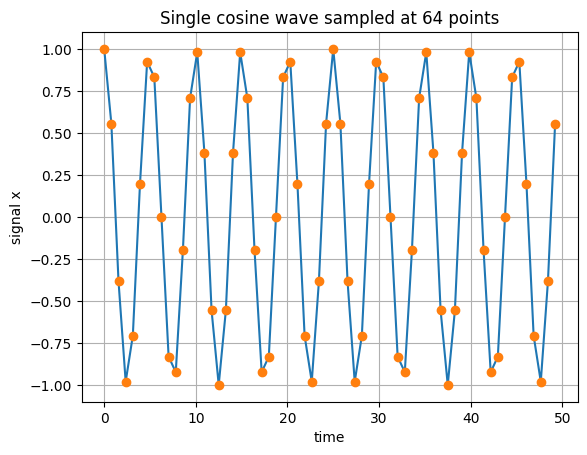

In [555]:
# Examine a small number of points to see what happens more easily
N=64 # the fft algorithm is fastest for N a power of 2
tau = 50.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.2 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

[-2.34719149e-17+0.00000000e+00j -1.44234527e-17-2.56177929e-17j
  5.55111512e-17-3.83765085e-17j -8.57990644e-17+5.55052307e-17j
  2.00135765e-17+4.74257251e-17j -2.95352304e-17-1.01624103e-16j
  7.28583860e-17+3.14376146e-17j -2.01213917e-17+1.45495195e-16j
 -9.95756170e-17-4.50336905e-17j -1.94689094e-16+1.14695735e-16j
  5.00000000e-01-6.25392914e-16j  1.86293653e-16+1.14475056e-16j
  1.75682533e-16-4.59590080e-17j  8.94052888e-18+1.83243212e-16j
  2.29212542e-17+2.84020996e-18j -1.06566143e-17-1.53861989e-16j
  7.28052380e-17+6.15826834e-17j  8.47962201e-17+9.78904927e-17j
 -5.55111512e-17-2.44987207e-17j  3.30479803e-17-9.37323639e-17j
  2.96527505e-16-4.02828576e-17j -4.80626831e-17+3.00031199e-16j
 -2.77555756e-17+3.83765085e-17j  3.01835937e-17+2.60178799e-16j
 -2.99517079e-16+7.00801377e-18j  5.09489916e-17-9.19403551e-17j
 -5.48137573e-17-4.12506924e-17j -9.34932174e-18+8.64561931e-17j
 -8.26162822e-17-2.40927567e-18j  3.94390583e-18-6.19369470e-17j
 -2.29212542e-17+1.671799

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


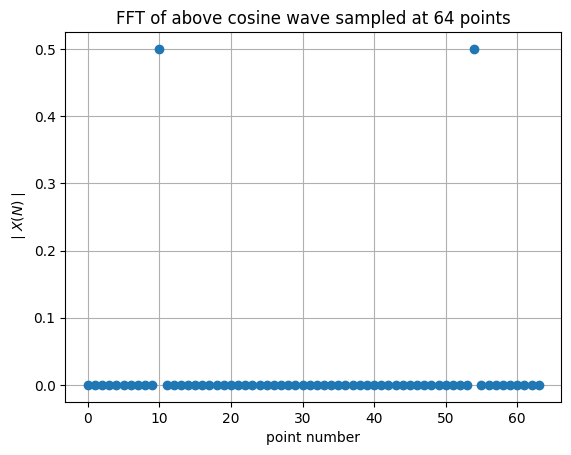

In [556]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

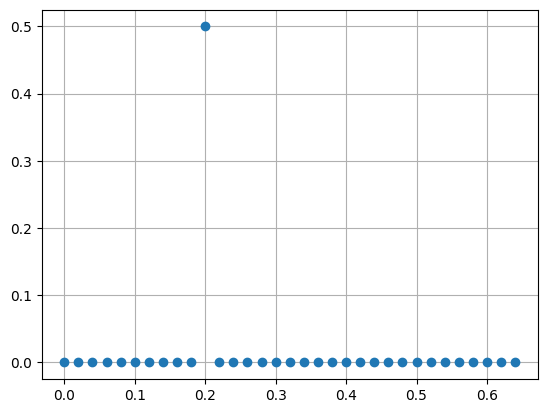

In [557]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq,X, 'o')
plt.grid()

[ 0.       0.78125  1.5625   2.34375  3.125    3.90625  4.6875   5.46875
  6.25     7.03125  7.8125   8.59375  9.375   10.15625 10.9375  11.71875
 12.5     13.28125 14.0625  14.84375 15.625   16.40625 17.1875  17.96875
 18.75    19.53125 20.3125  21.09375 21.875   22.65625 23.4375  24.21875
 25.      25.78125 26.5625  27.34375 28.125   28.90625 29.6875  30.46875
 31.25    32.03125 32.8125  33.59375 34.375   35.15625 35.9375  36.71875
 37.5     38.28125 39.0625  39.84375 40.625   41.40625 42.1875  42.96875
 43.75    44.53125 45.3125  46.09375 46.875   47.65625 48.4375  49.21875]


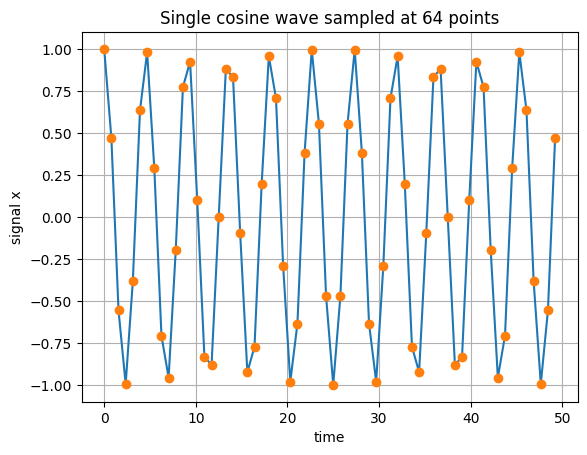

In [558]:
# Examine a small number of points to see what happens more easily
N=64 # the fft algorithm is fastest for N a power of 2
tau = 50.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.22 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

[-2.92719492e-16+0.00000000e+00j -1.50603067e-16-3.28528885e-18j
  6.42056010e-17+7.27983891e-17j -2.51534904e-16+1.04316932e-16j
 -2.22393785e-16-2.48361383e-17j -2.02095285e-16-2.24012852e-16j
 -1.84499861e-16+2.34321064e-16j -2.54123139e-16-1.20541392e-16j
 -4.92611757e-16-3.85048010e-16j  1.49029932e-16-2.56729218e-16j
 -3.78761799e-16+2.30448628e-16j  5.00000000e-01-1.51989339e-15j
  2.78847704e-16+1.62347872e-16j -1.73096835e-16-2.93723672e-16j
  3.86270199e-16-3.58697043e-16j  2.18598571e-16-1.70963062e-16j
  2.07965071e-16+5.83300769e-17j  2.31426038e-16-1.74604720e-16j
  2.09590250e-16-1.93255017e-17j  2.02962647e-16+8.35002505e-17j
  5.53448903e-17+9.49881903e-17j  1.11022302e-16+9.08394588e-17j
  8.93441043e-17+8.63633156e-17j  2.33896444e-17+6.83486913e-17j
 -4.64233732e-17+1.30710274e-17j -2.59515560e-19-1.49553915e-17j
 -1.38160209e-17-4.90476496e-17j  9.86264013e-19-1.17052787e-17j
  2.79068092e-17-8.87263731e-17j  4.07647186e-17-6.32607774e-17j
  1.03367801e-16-3.242480

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


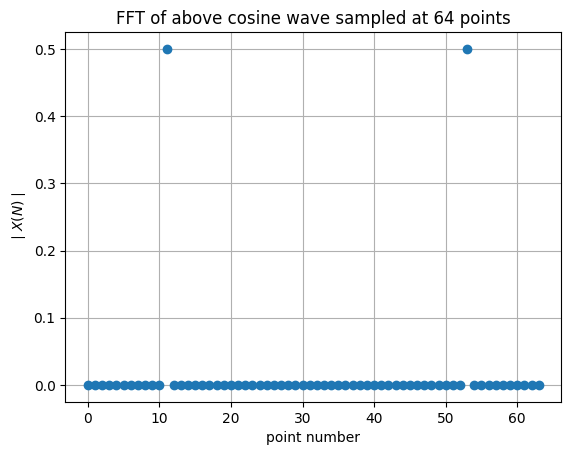

In [559]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

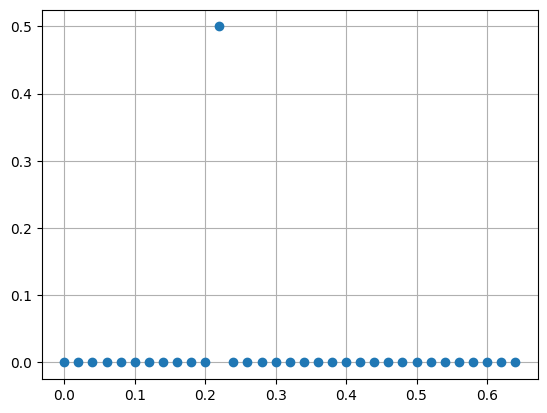

In [560]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq,X, 'o')
plt.grid()
#higher tau value graph becomes shorter , however also removes negative dip off of 0.22f

[0.      0.15625 0.3125  0.46875 0.625   0.78125 0.9375  1.09375 1.25
 1.40625 1.5625  1.71875 1.875   2.03125 2.1875  2.34375 2.5     2.65625
 2.8125  2.96875 3.125   3.28125 3.4375  3.59375 3.75    3.90625 4.0625
 4.21875 4.375   4.53125 4.6875  4.84375 5.      5.15625 5.3125  5.46875
 5.625   5.78125 5.9375  6.09375 6.25    6.40625 6.5625  6.71875 6.875
 7.03125 7.1875  7.34375 7.5     7.65625 7.8125  7.96875 8.125   8.28125
 8.4375  8.59375 8.75    8.90625 9.0625  9.21875 9.375   9.53125 9.6875
 9.84375]


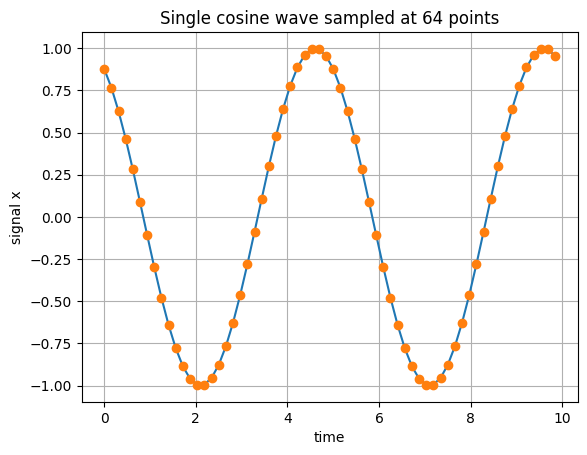

In [561]:
# Examine a small number of points to see what happens more easily
N=64 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.2 # frequency in Hz
x = np.cos((2*np.pi*f*t)+(0.5)) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

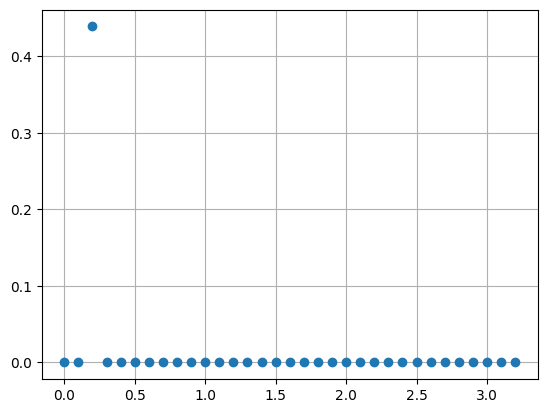

In [562]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq, X, 'o')
plt.grid()

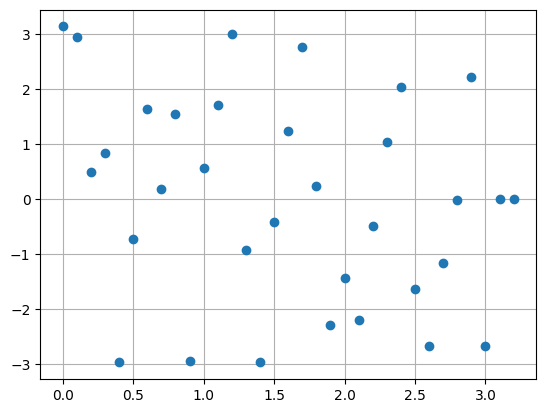

In [563]:
ang_X= np.angle(X)
plt.plot(frq,ang_X, 'o')
plt.grid()

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3775046551.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


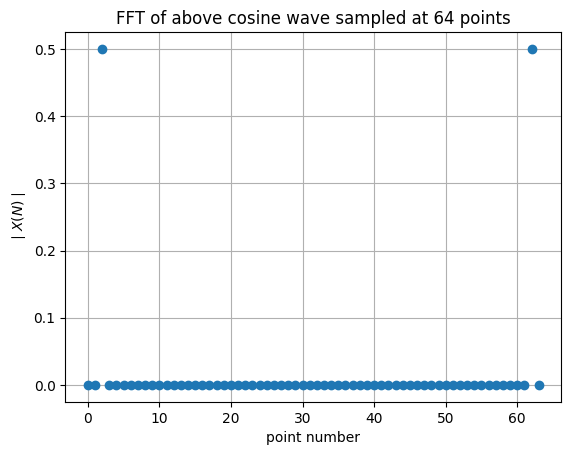

In [564]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()

[0.      0.15625 0.3125  0.46875 0.625   0.78125 0.9375  1.09375 1.25
 1.40625 1.5625  1.71875 1.875   2.03125 2.1875  2.34375 2.5     2.65625
 2.8125  2.96875 3.125   3.28125 3.4375  3.59375 3.75    3.90625 4.0625
 4.21875 4.375   4.53125 4.6875  4.84375 5.      5.15625 5.3125  5.46875
 5.625   5.78125 5.9375  6.09375 6.25    6.40625 6.5625  6.71875 6.875
 7.03125 7.1875  7.34375 7.5     7.65625 7.8125  7.96875 8.125   8.28125
 8.4375  8.59375 8.75    8.90625 9.0625  9.21875 9.375   9.53125 9.6875
 9.84375]


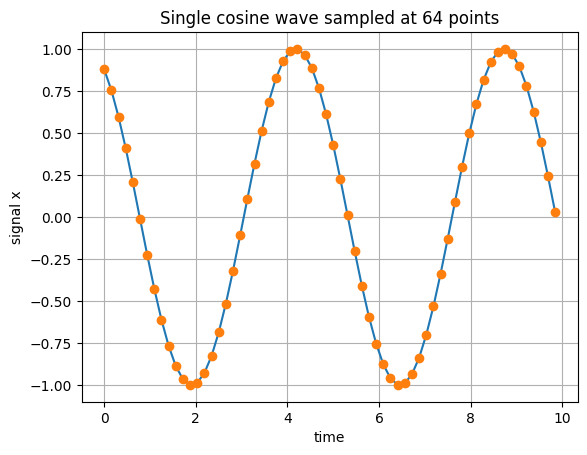

In [565]:
# Examine a small number of points to see what happens more easily
N=64 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.22 # frequency in Hz
x = np.cos((2*np.pi*f*t)+(0.5)) # create x array, amplitude 1.0
plt.plot(t,x )
plt.plot(t,x, 'o')
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('time')
plt.ylabel('signal x')
plt.grid()

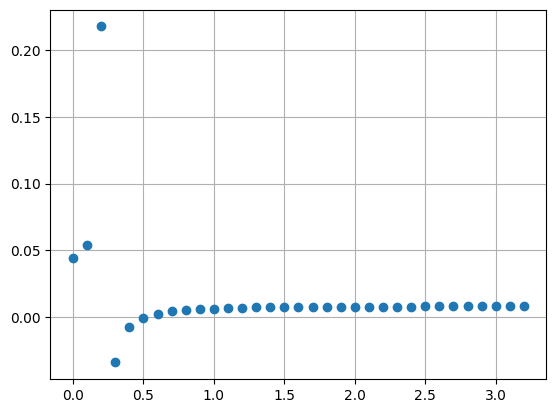

In [566]:
frq,X=Spectrum1(x, N/tau)
plt.plot(frq, X, 'o')
plt.grid()

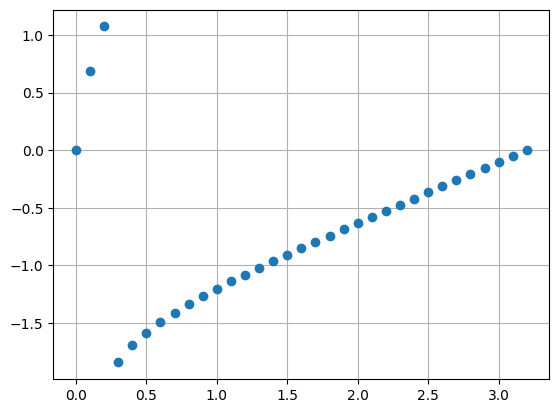

In [567]:
ang_X= np.angle(X)
plt.plot(frq,ang_X, 'o')
plt.grid()

[ 0.04457232+0.j          0.05405516+0.04416716j  0.21797367+0.40284174j
 -0.03420932-0.1215231j  -0.00763572-0.06005594j -0.00058608-0.04125093j
  0.00249934-0.03173543j  0.0041635 -0.025841j    0.00517436-0.02176355j
  0.00583811-0.01873899j  0.00629877-0.01638409j  0.00663203-0.01448375j
  0.00688105-0.01290709j  0.00707199-0.01156954j  0.0072215 -0.01041375j
  0.0073406 -0.00939937j  0.00743684-0.00849707j  0.00751553-0.00768498j
  0.00758048-0.0069464j   0.00763451-0.00626831j  0.00767972-0.00564043j
  0.0077177 -0.00505443j  0.00774967-0.00450352j  0.00777657-0.00398205j
  0.00779916-0.00348526j  0.00781801-0.0030091j   0.00783358-0.00255002j
  0.00784623-0.00210494j  0.00785624-0.00167108j  0.00786382-0.00124593j
  0.00786913-0.00082715j  0.00787228-0.00041254j  0.00787332+0.j
  0.00787228+0.00041254j  0.00786913+0.00082715j  0.00786382+0.00124593j
  0.00785624+0.00167108j  0.00784623+0.00210494j  0.00783358+0.00255002j
  0.00781801+0.0030091j   0.00779916+0.00348526j  0.0077765

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


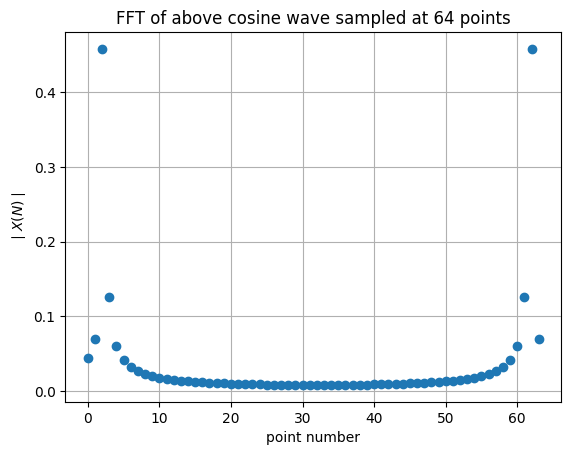

In [568]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

(0.0, 1.0)

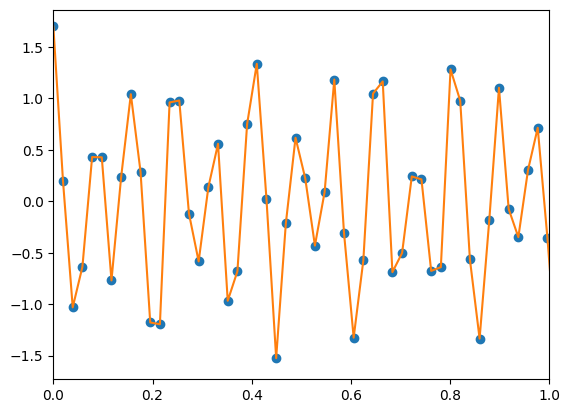

In [569]:
# Examine a small number of points to see what happens more easily
N=512 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds

f_1 = 12.3 # frequency in Hz
f_2 = 7.5 # frequency in Hz
f_3 = 30.0 # frequency in Hz
a_1 = 1.0
a_2 = 0.5
a_3 = 0.2
x = a_1*np.cos(2*np.pi*f_1*t) + a_2*np.cos(2*np.pi*f_2*t) + a_3*np.cos(2*np.pi*f_3*t)

def TestData(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values
    # (in python3, // ensures integer division)

    # frq is array of actual frequencies
    # X is complex array of amplitudes
    return frq , X#

plt.plot(t,x,'o')
plt.plot(t,x)
plt.xlim(0,1)

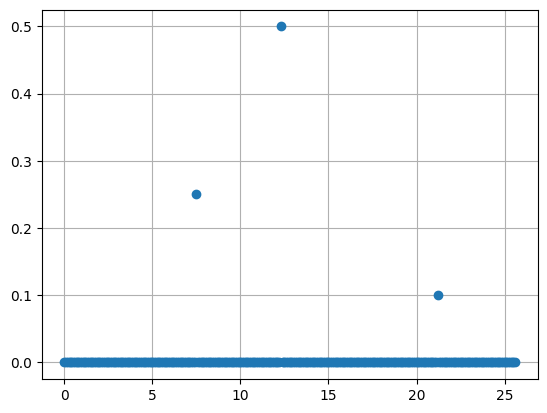

In [570]:
frq,X=TestData(x,N/tau)
plt.plot(frq,X,'o')
plt.grid()

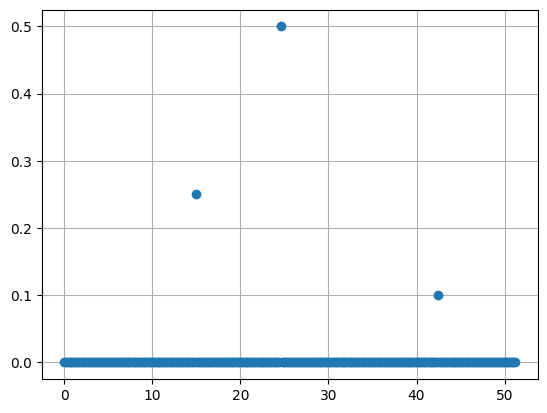

In [571]:
N=1024
frq,X=TestData(x,N/tau)
plt.plot(frq,X,'o')
plt.grid()

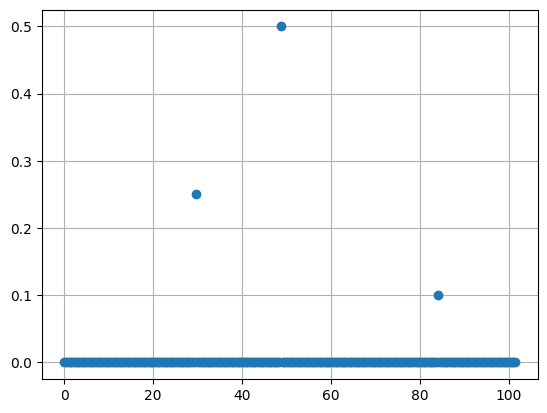

In [572]:
N=2028
frq,X=TestData(x,N/tau)
plt.plot(frq,X,'o')
plt.grid()